# Preliminary 2. market-basket-analysis

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/#association-rules-generation-from-frequent-itemsets

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
dataset

[['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
 ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [3]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [4]:
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
### alternatively:
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Onion, Eggs, Kidney Beans)"


In [5]:
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.4,(Nutmeg)
6,0.2,(Dill)
7,0.2,(Apple)
8,0.4,(Corn)
9,0.2,(Unicorn)


# practice
https://towardsdatascience.com/market-basket-analysis-knowledge-discovery-in-database-simplistic-approach-dc41659e1558

In [6]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.columns = df.columns.str.strip().str.lower()

In [8]:
df.shape

(541909, 8)

In [9]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율(%)' : (df.isnull().sum()/len(df)).round(2),
                       '고유값 수(nunique)' : df.nunique(),
                      })
    for col in tf.index:
        tf.loc[col, '자료 내용(cpntents)'] = str(df[col].unique()[0:5])
    return tf

In [13]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율(%),고유값 수(nunique),자료 내용(cpntents)
invoiceno,object,0,0.00,25900,[536365 536366 536367 536368 536369]
stockcode,object,0,0.00,4070,['85123A' 71053 '84406B' '84029G' '84029E']
description,object,1454,0.00,4223,['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'\n 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'\n 'RED WOOLLY HOTTIE WHITE HEART.']
quantity,int64,0,0.00,722,[ 6 8 2 32 3]
invoicedate,datetime64[ns],0,0.00,23260,['2010-12-01T08:26:00.000000000' '2010-12-01T08:28:00.000000000'\n '2010-12-01T08:34:00.000000000' '2010-12-01T08:35:00.000000000'\n '2010-12-01T08:45:00.000000000']
unitprice,float64,0,0.00,1630,[2.55 3.39 2.75 7.65 4.25]
customerid,float64,135080,0.25,4372,[17850. 13047. 12583. 13748. 15100.]
country,object,0,0.00,38,['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany']


<AxesSubplot:>

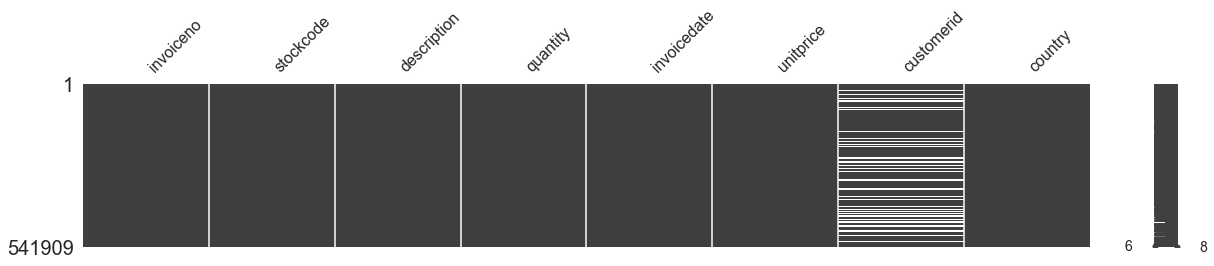

In [14]:
import missingno as msno
msno.matrix(df, figsize=(20,3))

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: invoiceno, Length: 22190, dtype: int64

<AxesSubplot:>

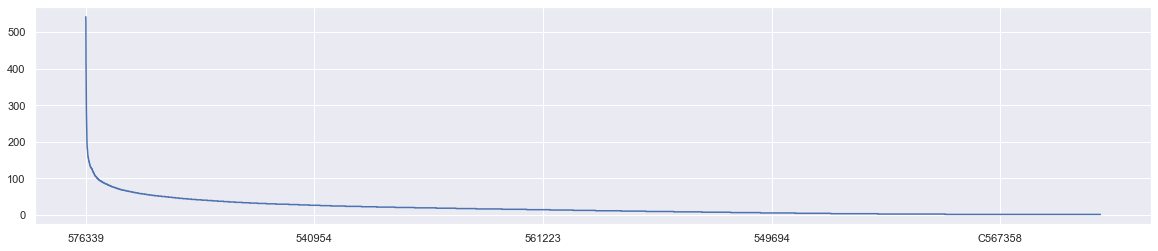

In [17]:
df['invoiceno'].value_counts()
df['invoiceno'].value_counts().plot(figsize=(20, 4))

In [23]:
df.dropna(axis=0, subset=['invoiceno']).shape
df['invoiceno'].shape

(541909, 8)

(541909,)

In [20]:
df['invoiceno'].astype('float64')

ValueError: could not convert string to float: 'C536379'

In [27]:
df['invoiceno'] = df['invoiceno'].astype('str')
df[df['invoiceno'].str.contains('C')]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [29]:
df = df[~df['invoiceno'].str.contains('C')]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

<AxesSubplot:>

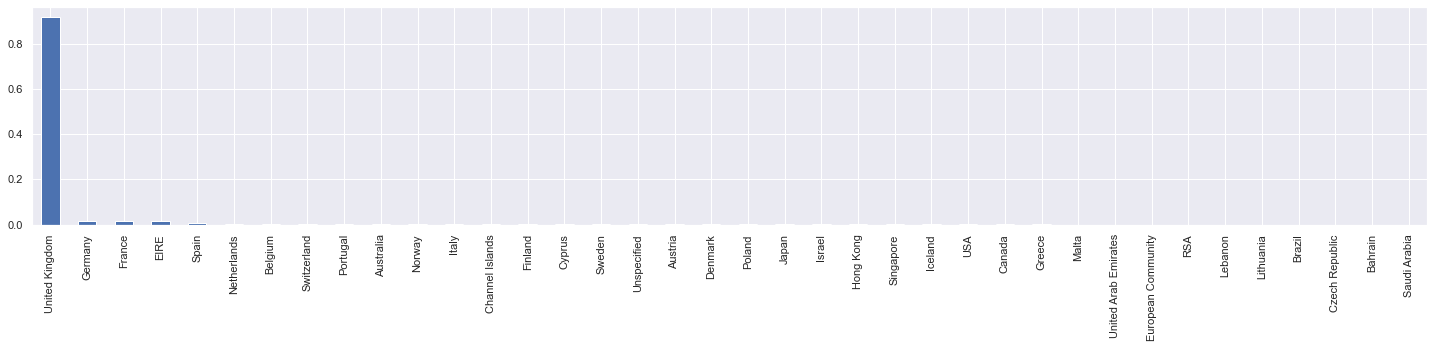

In [34]:
df['country'].unique()
df['country'].value_counts(normalize=True).plot(kind='bar', figsize=(25,4))

## Association Rules Mining
Association rule:
It identifies frequent patterns and associations(relations) among a set of items. Ex: If you go to buy a keyboard, you might also get a mouse. So place them aside in your market to get more profit.

Support:
Support refers to the default popularity of an item and can be calculated by finding the number of transactions containing a particular item divided by the total number of transactions.

Support (Keyboard) = (Transactions containing (Keyboard)) / (Total Transactions))
Confidence:
Confidence refers to the likelihood that item B (mouse) is also bought if item A (keyboard) is bought. Like our keyboard and mouse example.

Confidence(Keyboard→Mouse) = (Transactions containing both (Keyboard and Mouse))/(Transactions containing Keyboard)

Lift:
Lift(Keyboard -> Mouse) refers to the increase in the ratio of sale of Mouse when the Keyboard is sold.
Lift(Keyboard -> Mouse) can be calculated by dividing Confidence(Keyboard→Mouse) divided by Support(Mouse).

Lift(Keyboard -> Mouse) = (Confidence(Keyboard→Mouse)) / (Support (Mouse))

In [41]:
df[df['country'] == 'Spain'].shape

(2485, 8)

In [53]:
basket = (
    df[df['country'] == 'Spain'].groupby(['invoiceno', 'description'])['quantity'].sum().unstack().reset_index().
          fillna(0).set_index('invoiceno')
         )
basket.sample(20)

description,50'S CHRISTMAS GIFT BAG LARGE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
invoiceno,,,,,,,,,,,,,,,,,,,,,
578339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
577039,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0
547972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
571255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
def encode_units(x):
    if x <=0 :
        return 0
    else :
        return 1

In [57]:
basket_sets = basket.applymap(encode_units)

In [60]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
apriori()

In [63]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True) 
frequent_itemsets.head()

,support,itemsets
0,0.166667,(6 RIBBONS RUSTIC CHARM)
1,0.077778,(ALARM CLOCK BAKELIKE GREEN)
2,0.133333,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.111111,(CLASSIC METAL BIRDCAGE PLANT HOLDER)
4,0.100000,(DOLLY GIRL LUNCH BOX)


In [65]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.166667,0.133333,0.100000,0.600000,4.500000,0.077778,2.166667
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.133333,0.166667,0.100000,0.750000,4.500000,0.077778,3.333333
2,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.688889,0.166667,0.144444,0.209677,1.258065,0.029630,1.054422
3,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.166667,0.688889,0.144444,0.866667,1.258065,0.029630,2.333333
4,(POSTAGE),(ASSORTED COLOUR BIRD ORNAMENT),0.688889,0.133333,0.122222,0.177419,1.330645,0.030370,1.053595
5,(ASSORTED COLOUR BIRD ORNAMENT),(POSTAGE),0.133333,0.688889,0.122222,0.916667,1.330645,0.030370,3.733333
6,(CLASSIC METAL BIRDCAGE PLANT HOLDER),(POSTAGE),0.111111,0.688889,0.100000,0.900000,1.306452,0.023457,3.111111
7,(POSTAGE),(CLASSIC METAL BIRDCAGE PLANT HOLDER),0.688889,0.111111,0.100000,0.145161,1.306452,0.023457,1.039832
8,(DOORMAT SPOTTY HOME SWEET HOME),(POSTAGE),0.077778,0.688889,0.077778,1.000000,1.451613,0.024198,inf
9,(POSTAGE),(DOORMAT SPOTTY HOME SWEET HOME),0.688889,0.077778,0.077778,0.112903,1.451613,0.024198,1.039596


In [66]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.166667,0.133333,0.100000,0.600000,4.500000,0.077778,2.166667
1,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.133333,0.166667,0.100000,0.750000,4.500000,0.077778,3.333333
3,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.166667,0.688889,0.144444,0.866667,1.258065,0.029630,2.333333
5,(ASSORTED COLOUR BIRD ORNAMENT),(POSTAGE),0.133333,0.688889,0.122222,0.916667,1.330645,0.030370,3.733333
6,(CLASSIC METAL BIRDCAGE PLANT HOLDER),(POSTAGE),0.111111,0.688889,0.100000,0.900000,1.306452,0.023457,3.111111
8,(DOORMAT SPOTTY HOME SWEET HOME),(POSTAGE),0.077778,0.688889,0.077778,1.000000,1.451613,0.024198,inf
10,(PACK OF 72 RETROSPOT CAKE CASES),(POSTAGE),0.122222,0.688889,0.122222,1.000000,1.451613,0.038025,inf
12,(PLASTERS IN TIN SKULLS),(POSTAGE),0.111111,0.688889,0.088889,0.800000,1.161290,0.012346,1.555556
14,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.077778,0.088889,0.077778,1.000000,11.250000,0.070864,inf
15,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.088889,0.077778,0.077778,0.875000,11.250000,0.070864,7.377778


# Practice
https://wikidocs.net/123690

In [9]:
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

In [17]:
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [12]:
unique_li = [df[col].unique().tolist() for col in df.columns]
items = set([item for item_li in unique_li for item in item_li if item is not np.NaN ])
items

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine'}

In [16]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    uncommons
    commons

['Milk', 'Bagel']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Bagel', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Bagel', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Meat', 'Wine']

['Meat', 'Cheese']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Meat', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Cheese', 'Eggs', 'Wine']

['Cheese', 'Eggs', 'Meat', 'Wine']

['Bagel', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Meat']

['Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Pencil', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Milk', 'Cheese', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Bagel', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Diaper', 'Bagel']

['Wine', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bagel', 'Meat', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Pencil', 'Milk', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Meat', 'Cheese', 'Bread']

['Bagel', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Milk', 'Wine', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Cheese', 'Bread']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Eggs']

['Pencil', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Bagel', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bagel', 'Bread']

['Pencil', 'Bagel', 'Wine']

['Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat']

['Pencil', 'Eggs', 'Milk', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Cheese', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Pencil', 'Milk', 'Eggs', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Bread']

['Pencil', 'Bagel', 'Eggs', 'Meat']

['Wine', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat']

['Diaper', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Bagel', 'Eggs']

['Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat', 'Wine']

['Pencil', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs', 'Wine']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Wine']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Pencil', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Pencil', 'Bagel', 'Milk', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Diaper', 'Bread']

['Bagel', 'Meat', 'Bread']

['Wine', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Bagel']

['Wine', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Milk', 'Bread']

['Diaper', 'Eggs']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Milk', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Meat', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Pencil', 'Bagel', 'Cheese']

['Bagel', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat', 'Cheese', 'Wine']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Bagel', 'Eggs', 'Cheese']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Milk', 'Bagel', 'Meat', 'Bread']

['Wine', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Bagel', 'Meat', 'Wine']

['Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Eggs', 'Bread']

['Pencil', 'Milk', 'Cheese']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Bagel', 'Eggs', 'Bread']

['Milk', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs']

['Milk', 'Bagel', 'Bread', 'Diaper']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Bread']

['Pencil', 'Diaper', 'Milk', 'Eggs']

['Wine', 'Bagel', 'Diaper', 'Eggs', 'Bread']

['Pencil', 'Milk', 'Meat', 'Cheese']

['Pencil', 'Milk', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Milk', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Bread']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Cheese', 'Wine']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Cheese']

['Bagel', 'Meat', 'Cheese', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Diaper', 'Wine']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Meat', 'Eggs', 'Cheese']

['Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Meat']

['Pencil', 'Diaper', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Eggs']

['Pencil', 'Diaper', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Milk', 'Bread']

['Milk', 'Bagel', 'Eggs', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Bread']

['Diaper', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Milk', 'Bread']

['Eggs', 'Meat', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Pencil', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil']

['Bagel', 'Meat', 'Pencil', 'Eggs', 'Milk']

['Cheese', 'Diaper', 'Wine', 'Bread']

['Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Meat', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Wine', 'Bread']

['Bagel', 'Meat', 'Diaper']

['Wine', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Diaper', 'Wine', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Bagel', 'Cheese', 'Pencil', 'Milk', 'Bread']

['Diaper', 'Eggs', 'Meat', 'Wine']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs']

['Pencil', 'Milk', 'Wine', 'Bread']

['Diaper', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Eggs', 'Meat', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Milk']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Milk', 'Diaper', 'Meat', 'Wine']

['Bagel', 'Cheese', 'Pencil', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Milk']

['Cheese', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Pencil', 'Meat']

['Milk', 'Bagel']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat', 'Cheese']

['Pencil', 'Diaper', 'Milk', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Eggs', 'Bread']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Cheese']

['Milk', 'Eggs', 'Cheese', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Pencil']

['Milk', 'Meat', 'Cheese', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Eggs']

['Bagel', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Bread']

['Meat', 'Cheese', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Bagel', 'Eggs', 'Wine']

['Diaper', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Eggs']

['Pencil', 'Diaper', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Pencil', 'Milk', 'Eggs', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Wine']

['Pencil', 'Milk', 'Wine', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Diaper', 'Milk']

['Pencil', 'Bagel', 'Eggs', 'Bread']

['Bagel', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Meat', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Bagel']

['Milk', 'Diaper', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper']

['Milk', 'Cheese', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk']

['Milk', 'Diaper', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Milk']

['Diaper', 'Eggs', 'Wine', 'Bread']

['Pencil', 'Diaper', 'Milk']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Meat', 'Cheese', 'Bread']

['Bagel', 'Wine', 'Diaper']

['Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bread']

['Cheese', 'Wine']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Bread']

['Milk', 'Diaper']

['Pencil', 'Milk']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Bread']

['Eggs', 'Meat', 'Wine']

['Bagel', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Wine']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Bread']

['Milk', 'Diaper', 'Eggs', 'Cheese']

['Milk', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs']

['Milk', 'Diaper', 'Meat', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Diaper']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Eggs', 'Bread', 'Wine']

['Diaper', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Bagel', 'Eggs']

['Pencil', 'Bagel', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Wine', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs', 'Meat']

['Diaper', 'Eggs', 'Meat', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Milk']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Milk', 'Eggs', 'Meat', 'Wine']

['Bagel', 'Cheese', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Meat', 'Eggs', 'Milk']

['Pencil', 'Cheese', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Cheese', 'Wine']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Milk', 'Bagel', 'Eggs', 'Cheese']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs', 'Cheese']

['Bagel', 'Meat', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Cheese', 'Wine']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Bread']

['Pencil', 'Milk', 'Eggs']

['Diaper', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Cheese', 'Eggs', 'Wine', 'Bread']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Milk']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Wine', 'Cheese', 'Bread']

['Bagel', 'Eggs', 'Meat', 'Wine']

['Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Diaper', 'Cheese', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Eggs', 'Milk']

['Pencil', 'Bagel', 'Cheese', 'Diaper']

['Wine', 'Meat', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bread']

['Milk', 'Bagel', 'Eggs', 'Cheese']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk']

['Diaper', 'Bread']

['Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk']

['Bread', 'Bagel', 'Diaper', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk']

['Diaper', 'Wine', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Bagel']

['Bagel', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Milk', 'Bagel', 'Meat', 'Cheese']

['Wine', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Bagel', 'Meat', 'Cheese']

['Wine', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk']

['Diaper', 'Bread', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Milk']

['Diaper', 'Eggs', 'Bread', 'Wine']

['Bagel', 'Meat', 'Cheese']

['Wine', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Meat', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Cheese', 'Eggs', 'Wine']

['Cheese', 'Eggs', 'Meat', 'Wine']

['Bagel', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Meat']

['Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Pencil', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Milk', 'Cheese', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Bagel', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Diaper', 'Bagel']

['Wine', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bagel', 'Meat', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Pencil', 'Milk', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Meat', 'Cheese', 'Bread']

['Bagel', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Milk', 'Wine', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Cheese', 'Bread']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Eggs']

['Pencil', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Bagel', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Bagel', 'Bread']

['Pencil', 'Bagel', 'Wine']

['Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat']

['Pencil', 'Eggs', 'Milk', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Cheese', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Pencil', 'Milk', 'Eggs', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Bread']

['Pencil', 'Bagel', 'Eggs', 'Meat']

['Wine', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat']

['Diaper', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Bagel', 'Eggs']

['Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat', 'Wine']

['Pencil', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Eggs', 'Wine']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Wine']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Pencil', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Pencil', 'Bagel', 'Milk', 'Eggs']

['Wine', 'Meat', 'Cheese', 'Diaper', 'Bread']

['Bagel', 'Meat', 'Bread']

['Wine', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Bagel']

['Wine', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Milk', 'Bread']

['Diaper', 'Eggs']

['Pencil', 'Bagel', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Milk', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Meat', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Pencil', 'Bagel', 'Cheese']

['Bagel', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat', 'Cheese', 'Wine']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Bagel', 'Eggs', 'Cheese']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Milk', 'Bagel', 'Meat', 'Bread']

['Wine', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Bagel', 'Meat', 'Wine']

['Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Diaper', 'Eggs', 'Bread']

['Pencil', 'Milk', 'Cheese']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Bagel', 'Eggs', 'Bread']

['Milk', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Bread']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Eggs']

['Milk', 'Bagel', 'Bread', 'Diaper']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Bread']

['Pencil', 'Diaper', 'Milk', 'Eggs']

['Wine', 'Bagel', 'Diaper', 'Eggs', 'Bread']

['Pencil', 'Milk', 'Meat', 'Cheese']

['Pencil', 'Milk', 'Eggs', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Milk', 'Meat']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk']

['Pencil', 'Bread']

['Bagel', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Cheese', 'Wine']

['Wine', 'Meat', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Bagel', 'Cheese']

['Bagel', 'Meat', 'Cheese', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Diaper', 'Wine']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Milk', 'Bread']

['Meat', 'Eggs', 'Cheese']

['Wine', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Meat']

['Pencil', 'Diaper', 'Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Eggs']

['Pencil', 'Diaper', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Milk', 'Bread']

['Milk', 'Bagel', 'Eggs', 'Diaper']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Bread']

['Diaper', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Milk', 'Bread']

['Eggs', 'Meat', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Milk']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Milk', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Pencil', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil']

['Bagel', 'Meat', 'Pencil', 'Eggs', 'Milk']

['Cheese', 'Diaper', 'Wine', 'Bread']

['Cheese', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Bagel', 'Meat', 'Wine']

['Bagel', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Milk']

['Wine', 'Bread']

['Bagel', 'Meat', 'Diaper']

['Wine', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Diaper', 'Wine', 'Bread']

['Bagel', 'Meat', 'Cheese', 'Eggs', 'Milk']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Bread']

['Milk', 'Eggs', 'Meat', 'Cheese']

['Bagel', 'Cheese', 'Pencil', 'Milk', 'Bread']

['Diaper', 'Eggs', 'Meat', 'Wine']

['Wine', 'Bagel', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper', 'Meat']

['Bagel', 'Meat', 'Cheese', 'Diaper', 'Eggs']

['Pencil', 'Milk', 'Wine', 'Bread']

['Diaper', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Pencil', 'Eggs']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Diaper', 'Milk', 'Bread']

['Pencil', 'Eggs', 'Meat', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Milk']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs']

['Milk', 'Bagel', 'Bread']

['Wine', 'Bagel', 'Meat', 'Cheese', 'Pencil', 'Eggs', 'Milk', 'Bread']

['Diaper']

['Milk', 'Diaper', 'Meat', 'Wine']

['Bagel', 'Cheese', 'Pencil', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Milk']

['Cheese', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Cheese', 'Diaper', 'Eggs', 'Bread']

['Milk', 'Pencil', 'Meat']

['Milk', 'Bagel']

['Wine', 'Meat', 'Cheese', 'Pencil', 'Diaper', 'Eggs', 'Bread']

['Wine', 'Bagel', 'Pencil', 'Diaper', 'Eggs', 'Milk', 'Bread']

['Meat', 'Cheese']

['Pencil', 'Diaper', 'Milk', 'Cheese']

['Wine', 'Bagel', 'Meat', 'Eggs', 'Bread']

In [13]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc_item in uncommons:
        labels[uc_item] = 0
    for com_item in commons:
        labels[com_item] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
display(ohe_df)

,Milk,Bagel,Wine,Meat,Cheese,Pencil,Diaper,Eggs,Bread
0,0,0,1,1,1,1,1,1,1
1,1,0,1,1,1,1,1,0,1
2,1,0,1,1,1,0,0,1,0
3,1,0,1,1,1,0,0,1,0
4,0,0,1,1,0,1,0,0,0
5,1,1,1,0,0,1,1,1,1
6,0,0,1,0,1,1,0,1,0
7,1,1,0,0,0,1,1,0,1
8,1,0,1,0,1,0,1,1,1
9,0,1,1,1,1,1,1,1,0


## different code

In [62]:
corpus = []
for index, row in df[0:5].iterrows():
    list(row.dropna())
    fn = (',').join(list(row.dropna())) 
    corpus.append(fn)
corpus = pd.DataFrame(corpus)
corpus

['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper']

['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil']

['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine']

['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine']

['Meat', 'Pencil', 'Wine']

,0
0,"Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper"
1,"Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil"
2,"Cheese,Meat,Eggs,Milk,Wine"
3,"Cheese,Meat,Eggs,Milk,Wine"
4,"Meat,Pencil,Wine"


## 텍스트마이닝의 corpus를 만들기_list형태의 텍스트 문장

In [85]:
list(corpus[0].apply(lambda x : str(x)))

['Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper',
 'Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil',
 'Cheese,Meat,Eggs,Milk,Wine',
 'Cheese,Meat,Eggs,Milk,Wine',
 'Meat,Pencil,Wine']

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(list(corpus[0].apply(lambda x : str(x))))
vectorizer.get_feature_names()
print(X.toarray())

['bread', 'cheese', 'diaper', 'eggs', 'meat', 'milk', 'pencil', 'wine']

[[1 1 1 1 1 0 1 1]
 [1 1 1 0 1 1 1 1]
 [0 1 0 1 1 1 0 1]
 [0 1 0 1 1 1 0 1]
 [0 0 0 0 1 0 1 1]]


In [91]:
pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

,bread,cheese,diaper,eggs,meat,milk,pencil,wine
0,1,1,1,1,1,0,1,1
1,1,1,1,0,1,1,1,1
2,0,1,0,1,1,1,0,1
3,0,1,0,1,1,1,0,1
4,0,0,0,0,1,0,1,1


https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

vectorizer.get_feature_names()

print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## 빅카인즈분석
- https://www.bigkinds.or.kr/